In [ ]:
!pip install -U pymoo
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210095 sha256=ad9a243c8bf2543b0dd5261e41257fe8516e555e845c8a679f67de976f4556c8
  Stored in directory: /root/.cache/pip/wheels/91/a8/bc/5b55a10f763ee2c066ff2d94058d7dd64d570fc45adc027b3d
Successfully built grapheme
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.6 MB/s 

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
from keras import layers
from keras.utils import to_categorical
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import Problem
from pymoo.optimize import minimize
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pymoo.visualization.scatter import Scatter
from pymoo.core.callback import Callback
from skopt import gp_minimize

In [ ]:
data = pd.read_csv("Credit.csv")
data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,<100,4<=X<7,3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,<0,30,'existing paid','used car',3857,<100,1<=X<4,4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,'existing paid',radio/tv,1845,<100,1<=X<4,4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [ ]:
cat_columns = list(data.select_dtypes(include=['object']).columns)

In [ ]:
le = LabelEncoder()
for col in cat_columns:
    data[col] = le.fit_transform(data[col])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    data.iloc[:, :-1],
    data.iloc[:, -1],
    test_size=0.3,
    random_state=0
)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
18/18 [==============================] - 3s 30ms/step - loss: 35.4591 - accuracy: 0.5679 - val_loss: 17.6289 - val_accuracy: 0.3714
Epoch 2/20
18/18 [==============================] - 0s 9ms/step - loss: 8.3474 - accuracy: 0.5964 - val_loss: 8.0548 - val_accuracy: 0.4071
Epoch 3/20
18/18 [==============================] - 0s 7ms/step - loss: 5.5047 - accuracy: 0.6018 - val_loss: 5.2577 - val_accuracy: 0.4643
Epoch 4/20
18/18 [==============================] - 0s 8ms/step - loss: 6.1273 - accuracy: 0.6071 - val_loss: 3.4453 - val_accuracy: 0.5214
Epoch 5/20
18/18 [==============================] - 0s 4ms/step - loss: 2.1410 - accuracy: 0.6393 - val_loss: 4.5775 - val_accuracy: 0.6643
Epoch 6/20
18/18 [==============================] - 0s 4ms/step - loss: 5.3742 - accuracy: 0.5964 - val_loss: 4.3298 - val_accuracy: 0.6643
Epoch 7/20
18/18 [==============================] - 0s 4ms/step - loss: 3.3887 - accuracy: 0.6071 - val_loss: 4.3663 - val_accuracy: 0.4643
Epoch 8/20
18/18 

In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'Testing accuracy: {accuracy}')

10/10 [==============================] - 0s 2ms/step
Testing accuracy: 0.72


In [ ]:
def build_model():
    # Criar o modelo da rede neural convolucional
    model = keras.Sequential([
        keras.layers.Dense(64, activation="relu", input_shape=(20,)),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ])

    return model

In [ ]:
def chebyshev_loss(y_true, y_pred, model, lambda1, lambda2):
    # Função de perda Categorical Crossentropy
    ce_loss = keras.losses.BinaryCrossentropy()(y_true, y_pred)

    # Função de regularização L2
    l2_loss = sum([tf.nn.l2_loss(layer.kernel) for layer in model.layers if 'Conv2D' in str(layer) or 'Dense' in str(layer)])

    # Combinar as funções de perda com os pesos de Chebyshev
    combined_loss = lambda1 * ce_loss + lambda2 * l2_loss

    return combined_loss

In [ ]:
def objective(params):
    lambda1, lambda2 = params
    
    # Construir o modelo da CNN
    model = build_model()

    # Compilar o modelo com a função de perda personalizada e otimizador
    model.compile(loss=lambda y_true, y_pred: chebyshev_loss(y_true, y_pred, model, lambda1, lambda2), optimizer=keras.optimizers.Adam(), metrics=["accuracy"])

    # Treinar o modelo
    model.fit(x_train, y_train, batch_size=128, epochs=2, validation_split=0.1, verbose=1)

    # Avaliar o desempenho do modelo
    score = model.evaluate(x_test, y_test, verbose=0)
    
    return score[0]

In [ ]:
space = [(0.0001, 0.01, "uniform"), (0.0001, 0.01, "uniform")]

In [ ]:
result = gp_minimize(func=objective, dimensions=space, n_calls=10, random_state=42, verbose=1)

Iteration No: 1 started. Evaluating function at random point.
Epoch 1/2
5/5 [==============================] - 2s 205ms/step - loss: 1.8046 - accuracy: 0.6984 - val_loss: 1.2627 - val_accuracy: 0.6571
Epoch 2/2
5/5 [==============================] - 0s 23ms/step - loss: 0.5809 - accuracy: 0.6317 - val_loss: 0.3079 - val_accuracy: 0.3429
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 3.3001
Function value obtained: 0.3197
Current minimum: 0.3197
Iteration No: 2 started. Evaluating function at random point.
Epoch 1/2
5/5 [==============================] - 1s 90ms/step - loss: 1.0361 - accuracy: 0.3032 - val_loss: 0.3580 - val_accuracy: 0.6571
Epoch 2/2
5/5 [==============================] - 0s 19ms/step - loss: 0.4955 - accuracy: 0.6984 - val_loss: 0.6927 - val_accuracy: 0.6571
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.9290
Function value obtained: 0.5716
Current minimum: 0.3197
Iteration No: 3 started. Evaluating function at random point.

In [ ]:
best_lambda1, best_lambda2 = result.x
print(f"Melhores hiperparâmetros encontrados: lambda1 = {best_lambda1}, lambda2 = {best_lambda2}")

Melhores hiperparâmetros encontrados: lambda1 = 0.00032831800791001604, lambda2 = 0.005295269136558054


In [ ]:
#Construir e treinar o melhor modelo
best_model = build_model()
best_model.compile(loss=lambda y_true, y_pred: chebyshev_loss(y_true, y_pred, best_model, best_lambda1, best_lambda2),
optimizer=keras.optimizers.Adam(), metrics=["accuracy"])
best_model.fit(x_train, y_train, batch_size=128, epochs=2, validation_split=0.1, verbose=1)

Epoch 1/2
5/5 [==============================] - 2s 137ms/step - loss: 0.2238 - accuracy: 0.6984 - val_loss: 0.2008 - val_accuracy: 0.6571
Epoch 2/2
5/5 [==============================] - 0s 29ms/step - loss: 0.1956 - accuracy: 0.4984 - val_loss: 0.1929 - val_accuracy: 0.3571


In [ ]:
#Avaliar o melhor modelo
score = best_model.evaluate(x_test, y_test, verbose=1)
print(f"Test loss: {score[0]}, Test accuracy: {score[1]}")

10/10 [==============================] - 0s 5ms/step - loss: 0.1937 - accuracy: 0.2900
Test loss: 0.19372676312923431, Test accuracy: 0.28999999165534973


In [ ]:
#Função para calcular a norma L2 dos pesos do modelo
def calculate_l2_norm(model):
    l2_norm = sum([np.sum(np.square(layer.kernel.numpy())) for layer in model.layers if 'Conv2D' in str(layer) or 'Dense' in str(layer)])
    return l2_norm

In [ ]:
#Preparar os dados para o gráfico do conjunto Pareto
pareto_error_data = [objective(params) for params in result.x_iters]
pareto_norm_data = [calculate_l2_norm(build_model()) for params in result.x_iters]

Epoch 1/2
5/5 [==============================] - 2s 129ms/step - loss: 0.2065 - accuracy: 0.5365 - val_loss: 0.2398 - val_accuracy: 0.6429
Epoch 2/2
5/5 [==============================] - 0s 23ms/step - loss: 0.1797 - accuracy: 0.5111 - val_loss: 0.1417 - val_accuracy: 0.3429
Epoch 1/2
5/5 [==============================] - 1s 65ms/step - loss: 1.8674 - accuracy: 0.6984 - val_loss: 1.5157 - val_accuracy: 0.6571
Epoch 2/2
5/5 [==============================] - 0s 10ms/step - loss: 0.8359 - accuracy: 0.6984 - val_loss: 0.4073 - val_accuracy: 0.6429
Epoch 1/2
5/5 [==============================] - 1s 62ms/step - loss: 0.2660 - accuracy: 0.6889 - val_loss: 0.2133 - val_accuracy: 0.3429
Epoch 2/2
5/5 [==============================] - 0s 14ms/step - loss: 0.2255 - accuracy: 0.3016 - val_loss: 0.0461 - val_accuracy: 0.3143
Epoch 1/2
5/5 [==============================] - 1s 165ms/step - loss: 0.4876 - accuracy: 0.3635 - val_loss: 0.2140 - val_accuracy: 0.6571
Epoch 2/2
5/5 [=================

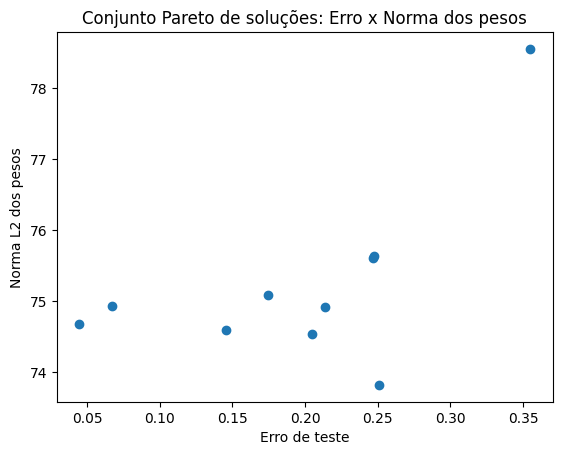

In [ ]:
#Criar o gráfico do conjunto Pareto
plt.scatter(pareto_error_data, pareto_norm_data)
plt.xlabel("Erro de teste")
plt.ylabel("Norma L2 dos pesos")
plt.title("Conjunto Pareto de soluções: Erro x Norma dos pesos")
plt.show()

Epoch 1/2
5/5 [==============================] - 1s 59ms/step - loss: 1.2153 - accuracy: 0.6984 - val_loss: 0.9464 - val_accuracy: 0.6571
Epoch 2/2
5/5 [==============================] - 0s 10ms/step - loss: 0.4759 - accuracy: 0.6937 - val_loss: 0.1525 - val_accuracy: 0.3429
Epoch 1/2
5/5 [==============================] - 1s 63ms/step - loss: 0.2615 - accuracy: 0.6111 - val_loss: 0.2719 - val_accuracy: 0.3429
Epoch 2/2
5/5 [==============================] - 0s 10ms/step - loss: 0.2470 - accuracy: 0.5143 - val_loss: 0.2393 - val_accuracy: 0.6571
Epoch 1/2
5/5 [==============================] - 1s 58ms/step - loss: 0.2957 - accuracy: 0.6984 - val_loss: 0.2016 - val_accuracy: 0.3429
Epoch 2/2
5/5 [==============================] - 0s 11ms/step - loss: 0.2370 - accuracy: 0.3016 - val_loss: 0.0546 - val_accuracy: 0.3571
Epoch 1/2
5/5 [==============================] - 1s 55ms/step - loss: 0.5440 - accuracy: 0.3063 - val_loss: 0.1398 - val_accuracy: 0.6000
Epoch 2/2
5/5 [===================

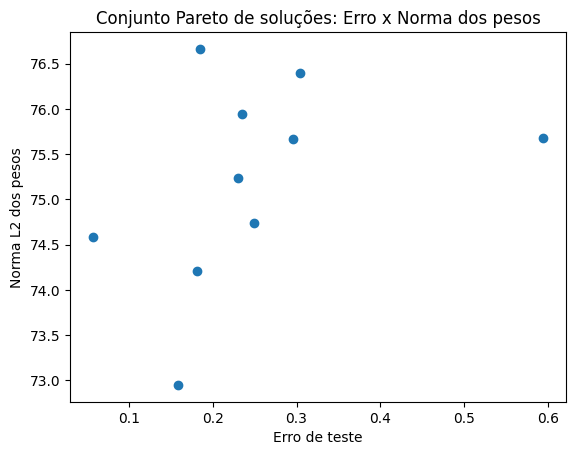

In [ ]:
#Função para calcular a norma L2 dos pesos do modelo
def calculate_l2_norm(model):
    l2_norm = sum([np.sum(np.square(layer.kernel.numpy())) for layer in model.layers if 'Conv2D' in str(layer) or 'Dense' in str(layer)])
    return l2_norm

#Preparar os dados para o gráfico do conjunto Pareto
pareto_error_data = [objective(params) for params in result.x_iters]
pareto_norm_data = [calculate_l2_norm(build_model()) for params in result.x_iters]

#Criar o gráfico do conjunto Pareto
plt.scatter(pareto_error_data, pareto_norm_data)
plt.xlabel("Erro de teste")
plt.ylabel("Norma L2 dos pesos")
plt.title("Conjunto Pareto de soluções: Erro x Norma dos pesos")
plt.show()

In [ ]:
loss, _ = best_model.evaluate(x_test, y_test, verbose=False)
weights = best_model.get_weights()
norma = np.linalg.norm(np.concatenate([w.flatten() for w in weights]))

In [ ]:
best_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                1344      
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________


peso 1 -> 20 * 64 = 1280 <br>
bias 1 -> 1280 + 64 = 1344 <br>
peso 2 -> 1344 + 64 * 32 = 3392 <br>
bias 2 -> 3392 + 32 = 3424 <br>
peso 3 -> 3424 + 32 * 1 = 3456 <br>
bias 3 -> 3456 + 1 = 3457

In [ ]:
class NeuralNetworkProblem(Problem):

  def __init__(self, x_train, y_train):
    super().__init__(n_var=3457, n_obj=2, n_constr=0, xl=-1, xu=1)
    self.x_train = x_train
    self.y_train = y_train

  def _evaluate(self, x, out, *args, **kwargs):
    loss = []
    norma = []
    model = build_model()
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    for linha in x:
      w1 = linha[:1280].reshape(20, 64)
      b1 = linha[1280: 1344]
      w2 = linha[1344: 3392].reshape(64, 32)
      b2 = linha[3392: 3424]
      w3 = linha[3424: 3456].reshape(32, 1)
      b3 = linha[3456:]
      model.set_weights([w1, b1, w2, b2, w3, b3])

      l, a = model.evaluate(self.x_train, self.y_train, verbose=False)
      loss.append(l)
      norma.append(np.linalg.norm(linha))

      # Set the objectives
    out["F"] = np.column_stack([loss, norma])

In [ ]:
problem = NeuralNetworkProblem(x_train, y_train)
algorithm = NSGA2(
    pop_size=100,
)
res = minimize(
    problem,
    algorithm,
    ("n_gen", 100),
    verbose=True,
    save_history=True,
    seed=1
)

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      4 |             - |             -
     2 |      200 |      4 |  0.0882082606 |         ideal
     3 |      300 |      6 |  0.6316782283 |         ideal
     4 |      400 |      7 |  0.0204090757 |             f
     5 |      500 |     10 |  0.3228651705 |         ideal
     6 |      600 |     11 |  0.0791486641 |             f
     7 |      700 |      4 |  0.4069800725 |         ideal
     8 |      800 |      9 |  0.0989595537 |         ideal
     9 |      900 |      5 |  0.0365259896 |         ideal
    10 |     1000 |      7 |  0.0638574068 |         ideal
    11 |     1100 |     11 |  0.1925833042 |         nadir
    12 |     1200 |     15 |  0.0824155831 |         ideal
    13 |     1300 |     13 |  0.1646950639 |         ideal
    14 |     1400 |      8 |  0.1838247521 |         nadir
    15 |     1500 |      7 |  0.1234746660 |         ideal
    16 |     1600 |      8 |  0.0167116147 |            

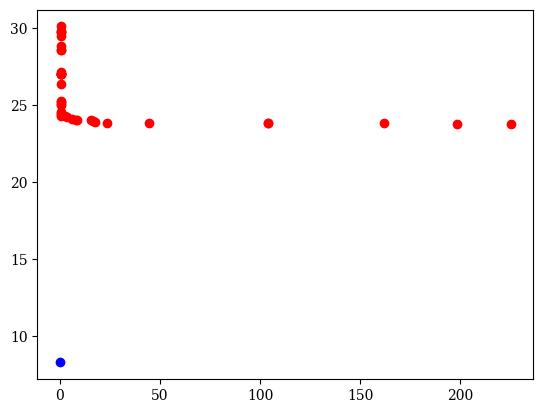

In [ ]:
F = res.F
plt.scatter(F[:, 0], F[:, 1], color="red")
plt.scatter(loss, norma, color="blue" )

In [ ]:
problem = NeuralNetworkProblem(x_train, y_train)
algorithm = NSGA2(
    pop_size=100,
)
res = minimize(
    problem,
    algorithm,
    ("n_gen", 100),
    verbose=True,
    save_history=True,
)

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      5 |             - |             -
     2 |      200 |      3 |  0.2821342236 |         ideal
     3 |      300 |      8 |  0.4120555643 |         ideal
     4 |      400 |      7 |  0.3728683388 |         ideal
     5 |      500 |      8 |  0.0652767624 |         ideal
     6 |      600 |      9 |  0.1481826247 |         ideal
     7 |      700 |      8 |  0.0881418494 |         ideal
     8 |      800 |      9 |  0.1270538910 |         ideal
     9 |      900 |     12 |  0.1823817491 |         ideal
    10 |     1000 |     10 |  0.1103618609 |         nadir
    11 |     1100 |     10 |  0.1934433052 |         ideal
    12 |     1200 |     11 |  0.0308041960 |         ideal
    13 |     1300 |     12 |  0.0597873136 |         ideal
    14 |     1400 |     12 |  0.0397641647 |         ideal
    15 |     1500 |     12 |  0.0708957641 |         ideal
    16 |     1600 |     14 |  0.0335834490 |            

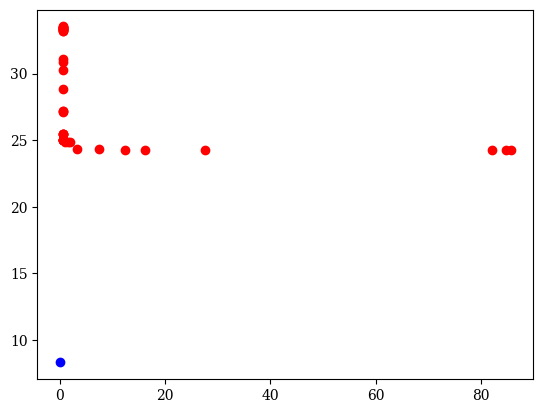

In [ ]:
F = res.F
plt.scatter(F[:, 0], F[:, 1], color="red")
plt.scatter(loss, norma, color="blue" )